In [1]:
import os ,sys 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
np.random.seed(101)

In [3]:
df = pd.read_csv('SubCh1_TrainingData.csv')

In [4]:
df.set_index("Sample_Name",inplace=True)

In [5]:
df_edit = pd.concat( [df, pd.get_dummies(df["Treatment"]),pd.get_dummies( df["Timepoint"])]
                         ,axis=1,sort=True )
df = df_edit.drop(["Treatment","Timepoint","BioRep","Isolate"],axis=1)

In [6]:
y = df["DHA_IC50"]
X = df.drop("DHA_IC50",axis=1)

#df[["DHA", "UT" ,"24HR", "6HR"]]

In [7]:
df_test = pd.read_csv("SubCh1_TestData.csv")
df_test.set_index("Sample_Names",inplace=True)
df_test_edit = pd.concat( [df_test, pd.get_dummies(df_test["Treatment"]),pd.get_dummies( df_test["Timepoint"])]
                         ,axis=1,sort=True )
df_test = df_test_edit.drop(["Treatment","Timepoint","BioRep","Isolate"],axis=1)

In [8]:
X_test = df_test.drop("DHA_IC50",axis=1)
y_test = df_test["DHA_IC50"]

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
def build_model():
    model = keras.Sequential([
    layers.Dense(640, activation=tf.nn.relu, input_shape=[X.shape[1]]),
    layers.Dense(640, activation=tf.nn.relu),
        layers.Dense(640, activation=tf.nn.relu),
        layers.Dense(640, activation=tf.nn.relu),
        layers.Dense(640, activation=tf.nn.relu),
   # layers.Dense(64, activation=tf.nn.relu),
    #layers.Dense(64, activation=tf.nn.relu),
#         layers.Dense(128, activation=tf.nn.relu),
#         layers.Dense(128, activation=tf.nn.relu),
#         layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [13]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('.')
            #print('.', end='')


In [14]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, epochs=1000,batch_size=2,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

.


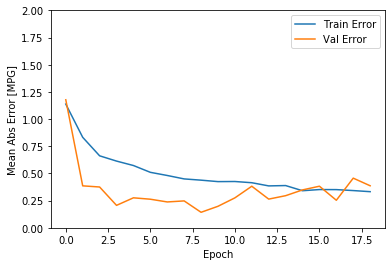

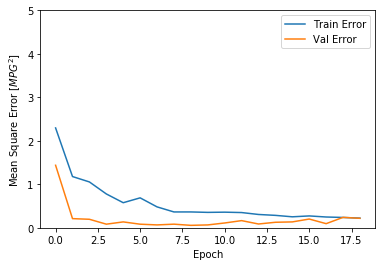

In [15]:
def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,2])
#     plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,5])
#     plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
df_pred= pd.DataFrame(y_pred,index=X_test.index,columns=["DHA_IC50"])

In [18]:
df_pred["Isolate2"]=df_pred.index

In [19]:
df_pred["Isolate"]= df_pred["Isolate2"].apply( lambda x: x.split(".")[0] )
df_pred.drop("Isolate2",axis=1,inplace=True)

In [20]:
df_pred= df_pred[["Isolate","DHA_IC50"]]

In [21]:
df_pred.size

400

In [23]:
len (df_pred["Isolate"].unique())

25

In [24]:
df_pred["Isolate"].unique()

array(['isolate_31', 'isolate_32', 'isolate_33', 'isolate_34',
       'isolate_35', 'isolate_36', 'isolate_37', 'isolate_38',
       'isolate_39', 'isolate_40', 'isolate_41', 'isolate_42',
       'isolate_43', 'isolate_44', 'isolate_45', 'isolate_46',
       'isolate_47', 'isolate_48', 'isolate_49', 'isolate_50',
       'isolate_51', 'isolate_52', 'isolate_53', 'isolate_54',
       'isolate_55'], dtype=object)

In [23]:
# df_pred
submision = []
for m in df_pred["Isolate"].unique():
    std = df_pred[df_pred["Isolate"] == m]["DHA_IC50"].std()
    mean_avg = df_pred[df_pred["Isolate"] == m]["DHA_IC50"].mean()
    #minimun = df_pred[df_pred["Isolate"] == m]["Predicted_IC50"].min()
    submision.append((m, mean_avg  ))
#     if minimun+std > 0.6 :
#         submision.append((m, "FAST", minimun+std  ))
#     else:
#         submision.append((m, "SLOW", minimun+std  ))

In [24]:
final_df = pd.DataFrame(submision,columns=["Isolate","Predicted_IC50"])

In [25]:
#df_pred.to_csv("SubCh1_Submission_DBB.txt",sep="\t",index=False)

In [ ]:
final_df.to_csv("SubCh1_Submission_DBB.txt",sep="\t",index=False)